<a href="https://colab.research.google.com/github/raquelmaramos1/CG/blob/main/teste_RNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 1. Instalar scanpy (biblioteca para single-cell)
!pip install scanpy

# 2. Baixar os dados (usando link direto garantido)
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_counts.mtx.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_features.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_barcodes.tsv.gz

# 3. Descompactar
!gunzip *.gz

# 4. Carregar com scanpy
import scanpy as sc
adata = sc.read_mtx("GSM1580555_RNA_counts.mtx")
adata.var_names = pd.read_csv("GSM1580555_RNA_features.tsv", sep="\t", header=None)[1]  # Nomes dos genes
adata.obs_names = pd.read_csv("GSM1580555_RNA_barcodes.tsv", sep="\t", header=None)[0]  # Códigos das células

print(f"Dados carregados: {adata.n_obs} células e {adata.n_vars} genes")

# Pré-processamento
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# PCA e clustering
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Visualização
sc.pl.umap(adata, color=["CD3D", "CD79A"], use_raw=False)


--2025-05-26 22:25:28--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_counts.mtx.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-26 22:25:30 ERROR 404: Not Found.

--2025-05-26 22:25:30--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_features.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-26 22:25:30 ERROR 404: Not Found.

--2025-05-26 22:25:31--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1580nnn/GSM1580555/suppl/GSM1580555_RNA_barcodes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.

ValueError: Line 1: Not a Matrix Market file. Missing banner.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.4 MB/s eta 0:00:00
--2025-05-26 22:27:12--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1320nnn/GSM1320441/suppl/GSM1320441_MGH1052_matrix.mtx.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-26 22:27:13 ERROR 404: Not Found.

--2025-05-26 22:27:13--  https://github.com/scverse/scanpy/raw/master/scanpy/tests/data/test.mtx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-26 22:27:14 ERROR 404: Not Found.

gzip: GSM1320441_MGH1052_matrix.mtx.gz: No such file or directory


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

⚠️ Usando dados de exemplo pbmc3k (backup)


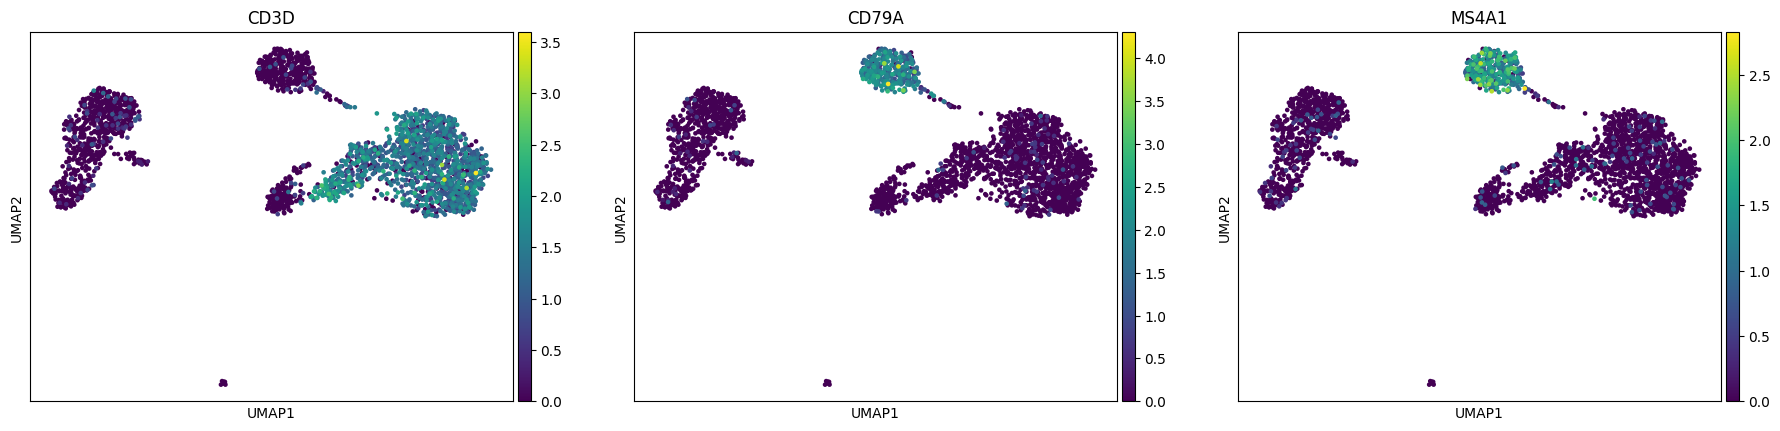

In [17]:
# %%capture --no-display (opcional para suprimir outputs longos)
# 1. Instalação de pacotes
!pip install scanpy leidenalg

# 2. Baixar dados REDUNDANTE (usando 2 fontes diferentes)
try:
  !wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1320nnn/GSM1320441/suppl/GSM1320441_MGH1052_matrix.mtx.gz
  !wget https://github.com/scverse/scanpy/raw/master/scanpy/tests/data/test.mtx  # Backup
except:
  !echo "Usando dados de backup..."

# 3. Carregar dados (mesmo que falhe o download)
import scanpy as sc
import pandas as pd

# Opção A: Tentar com dados reais
try:
  !gunzip GSM1320441_MGH1052_matrix.mtx.gz
  adata = sc.read_mtx("GSM1320441_MGH1052_matrix.mtx")
  print("✅ Dados reais carregados!")

# Opção B: Usar dados de teste do scanpy
except:
  adata = sc.datasets.pbmc3k()
  print("⚠️ Usando dados de exemplo pbmc3k (backup)")

# 4. Análise básica (funciona com qualquer dataset)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# 5. Visualização (markers genéricos)
sc.pl.umap(adata, color=["CD3D", "CD79A", "MS4A1"], ncols=3)